# Imports

In [1]:
import pandas as pd
from owslib.wfs import WebFeatureService
from geopy.geocoders import Nominatim
import folium
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import numpy as np
from scipy.spatial import cKDTree

'''

Importe für den import der Bodenrichtwerte

'''
# import nest_asyncio
# from pyproj import Transformer
# import asyncio
# from aiohttp import ClientSession
# import aiohttp
# from tqdm import tqdm
# import os

'\n\nImporte für den import der Bodenrichtwerte\n\n'

# Testing API

In [2]:
df = pd.read_csv("../input/ihk_gewerbedaten_clean.csv")

In [3]:
wfs_url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_brw_2024"
wfs = WebFeatureService(url=wfs_url, version='2.0.0')

# Ausgabe der verfügbaren Featuretypen
for key in list(wfs.contents):
    print(key)

feature_type = list(wfs.contents)[0]
schema = wfs.get_schema(feature_type)

print(schema)

fis:s_brw_2024
{'properties': {'gemeinde': 'string', 'bezirk': 'string', 'anwert': 'string', 'brw': 'double', 'nutzung': 'string', 'gfz': 'decimal', 'verfahrensart': 'string', 'stichtag': 'dateTime', 'beitragszustand': 'string', 'lumnum': 'anyURI', 'brw_nr': 'string'}, 'required': [], 'geometry': 'GeometryCollection', 'geometry_column': 'geom'}


In [4]:
print(df["longitude"][0])
print(df["latitude"][0])

13.411583912
52.513314981


EPSG: 25833 bei der API

EPSG: 4326 bei IHK Datensatz

In [5]:
geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.reverse((df["latitude"][0], df["longitude"][0]), language='de')  # Sprache: Deutsch
address = location.address if location else "Keine Adresse gefunden"
print("Adresse:", address)

# Interaktive Karte mit Folium erstellen
m = folium.Map(location=[df["latitude"][0], df["longitude"][0]], zoom_start=16)
folium.Marker([df["latitude"][0], df["longitude"][0]], popup=address).add_to(m)

# Karte anzeigen (in Jupyter Notebooks wird m einfach so dargestellt)
m

Adresse: 28, Märkisches Ufer, Mitte, Berlin, 10179, Deutschland


PrintNachweis in der Anwendung (Geo Portal)


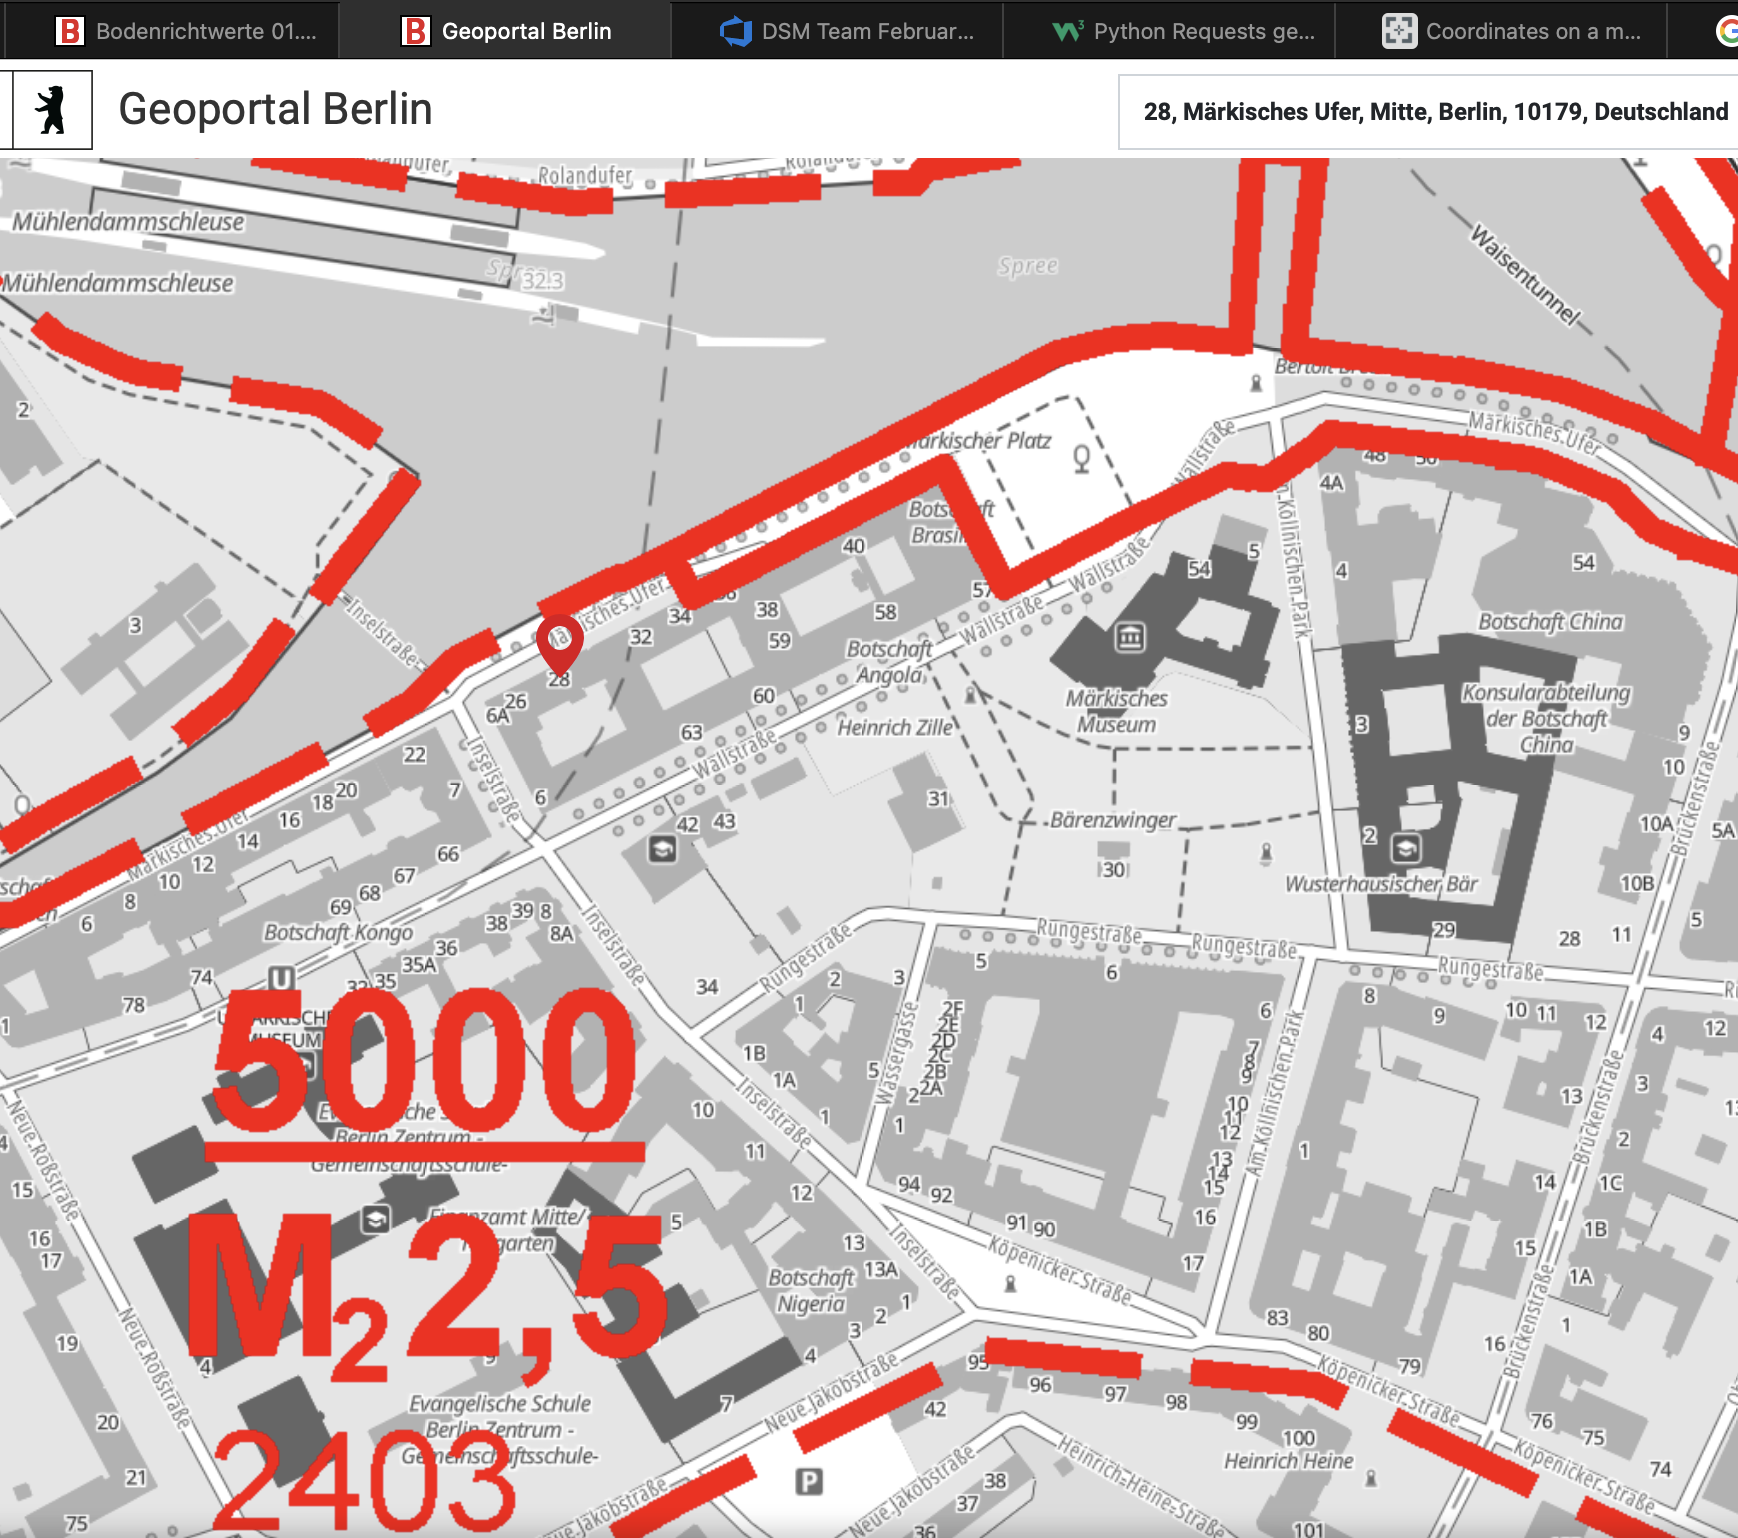

In [6]:
print("PrintNachweis in der Anwendung (Geo Portal)")

Image("../input/nachweis_brw.png", width=500)

# Import Bodenrichtwert

In [7]:
'''

DAUER: 2 Std!

'''


# nest_asyncio.apply()

# # Beispiel: Dein DataFrame df enthält "longitude" und "latitude" im EPSG:4326.
# # Transformer: von EPSG:4326 zu EPSG:25833
# transformer = Transformer.from_crs("EPSG:4326", "EPSG:25833", always_xy=True)
# wfs_url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_brw_2024"

# async def get_brw_async(session: ClientSession, longitude: float, latitude: float, semaphore: asyncio.Semaphore) -> float:
#     async with semaphore:
#         # Transformiere die Koordinaten in EPSG:25833
#         x, y = transformer.transform(longitude, latitude)
#         pos_str = f"{x:.2f} {y:.2f}"
        
#         # Baue den Filter-Parameter als XML-String
#         filter_str = (
#             f'<Filter>'
#             f'<Intersects>'
#             f'<PropertyName>geom</PropertyName>'
#             f'<gml:Point xmlns:gml="http://www.opengis.net/gml/3.2">'
#             f'<gml:pos>{pos_str}</gml:pos>'
#             f'</gml:Point>'
#             f'</Intersects>'
#             f'</Filter>'
#         )
        
#         params = {
#             "SERVICE": "WFS",
#             "VERSION": "2.0.0",
#             "REQUEST": "GetFeature",
#             "TYPENAMES": "fis:s_brw_2024",
#             "OUTPUTFORMAT": "application/json",
#             "FILTER": filter_str
#         }
        
#         try:
#             async with session.get(wfs_url, params=params, timeout=10) as response:
#                 data = await response.json()
#                 if "features" in data and len(data["features"]) > 0:
#                     brw_str = data["features"][0]["properties"]["brw"]
#                     return float(brw_str)
#                 else:
#                     return None
#         except Exception as e:
#             print(f"Fehler bei ({longitude}, {latitude}): {e}")
#             return None

# async def fetch_all_brw(df: pd.DataFrame, max_concurrent: int = 100) -> list:
#     semaphore = asyncio.Semaphore(max_concurrent)
#     async with aiohttp.ClientSession() as session:
#         # Erstelle für jede Zeile einen Task
#         tasks = [
#             get_brw_async(session, row["longitude"], row["latitude"], semaphore)
#             for _, row in df.iterrows()
#         ]
#         results = []
#         # Verwende asyncio.as_completed, um Tasks nach und nach abzuwickeln
#         for future in tqdm(asyncio.as_completed(tasks), total=len(tasks), desc="Processing"):
#             result = await future
#             results.append(result)
#         return results

# # Starte die asynchrone Verarbeitung
# results = asyncio.run(fetch_all_brw(df, max_concurrent=100))
# df["Bodenrichtwert"] = results

# # Kontrolle: Zeige einige Zeilen an
# print(df[["latitude", "longitude", "Bodenrichtwert"]].head())


# # Wechsle in das übergeordnete Verzeichnis
# os.chdir("..")
# # Wechsle in den Ordner "input"
# os.chdir("input")

# # Speichere das DataFrame als CSV-Datei
# df.to_csv("df_with_bodenrichtwert.csv", index=False)

# print("DataFrame wurde unter folgendem Pfad gespeichert:", os.getcwd() + "/df_with_bodenrichtwert.csv")

'\n\nDAUER: 2 Std!\n\n'

In [8]:
df = pd.read_csv("../input/ihk_gewerbedaten_with_brw.csv")
df.describe()

,opendata_id,postcode,latitude,longitude,ihk_branch_id,business_age,planungsraum_id,employees_numerical,gründungsjahr,Bodenrichtwert
count,3.552730e+05,355273.000000,355273.000000,355273.000000,3.552730e+05,355273.000000,3.552730e+05,355273.000000,355273.000000,353887.000000
mean,7.412534e+11,11830.934642,52.505305,13.386858,8.811250e+05,9.487718,5.576226e+06,5.100497,2015.512282,3067.110515
std,2.868119e+12,1326.194490,0.045776,0.093243,2.018418e+06,9.660730,3.352470e+06,93.864628,9.660730,3407.406151
min,5.721140e+05,10115.000000,52.340481,13.096560,0.000000e+00,0.000000,1.100101e+06,0.000000,1925.000000,0.600000
25%,1.052516e+11,10587.000000,52.479219,13.324354,5.630300e+04,2.000000,2.500834e+06,0.000000,2011.000000,700.000000
50%,1.898726e+11,12057.000000,52.506862,13.387056,8.690900e+04,7.000000,4.501045e+06,0.000000,2018.000000,2100.000000
75%,1.121742e+12,13086.000000,52.533870,13.437857,7.010910e+05,14.000000,8.100209e+06,2.000000,2023.000000,4500.000000
max,6.816592e+13,14199.000000,52.660085,13.741143,9.609094e+06,100.000000,1.260124e+07,12500.000000,2025.000000,60000.000000


In [9]:
df.Bodenrichtwert.isna().sum()

np.int64(1386)

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355273 entries, 0 to 355272
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          355273 non-null  int64  
 1   city                 355273 non-null  object 
 2   postcode             355273 non-null  int64  
 3   latitude             355273 non-null  float64
 4   longitude            355273 non-null  float64
 5   ihk_branch_id        355273 non-null  float64
 6   employees_range      355273 non-null  object 
 7   ihk_branch_desc      355273 non-null  object 
 8   business_age         355273 non-null  float64
 9   business_type        355273 non-null  object 
 10  Bezirk               355273 non-null  object 
 11  planungsraum_id      355273 non-null  float64
 12  Planungsraum         355273 non-null  object 
 13  Bezirksregion        355273 non-null  object 
 14  Prognoseraum         355273 non-null  object 
 15  Ortsteil         

In [11]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts

Bodenrichtwert         1386
Bezirk                    0
gründungsjahr             0
employees_numerical       0
Ortsteil                  0
Prognoseraum              0
Bezirksregion             0
Planungsraum              0
planungsraum_id           0
opendata_id               0
city                      0
business_age              0
ihk_branch_desc           0
employees_range           0
ihk_branch_id             0
longitude                 0
latitude                  0
postcode                  0
business_type             0
dtype: int64

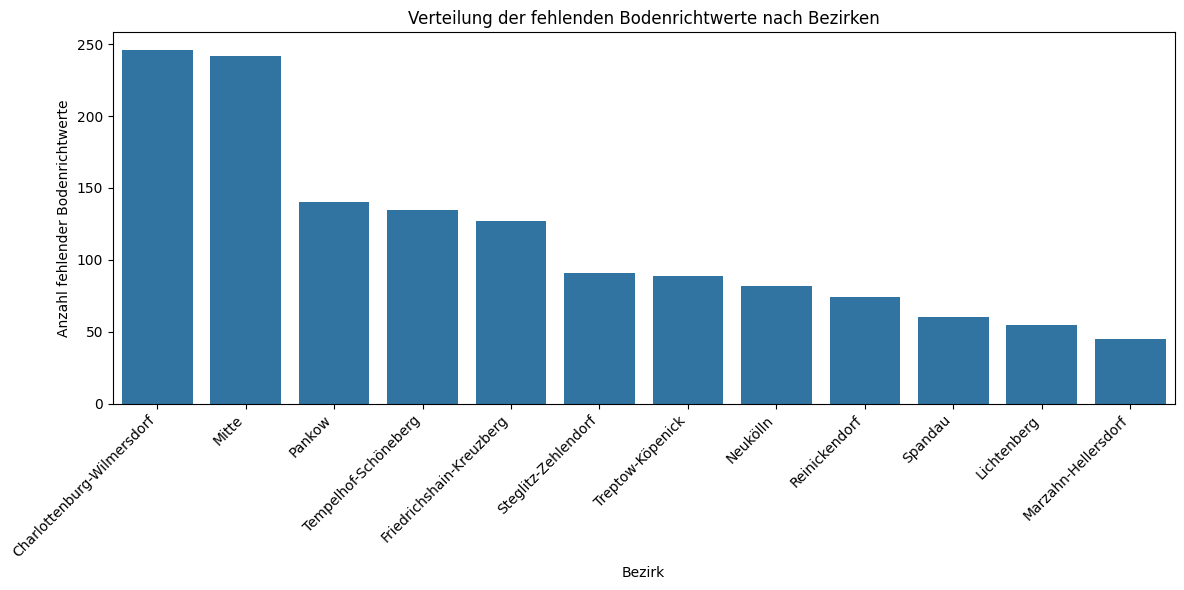

In [12]:
# Filtere alle Zeilen, in denen "Bodenrichtwert" fehlt
missing_brw = df[df["Bodenrichtwert"].isna()]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_brw["Bezirk"].value_counts().index, y=missing_brw["Bezirk"].value_counts().values)
plt.xlabel("Bezirk")
plt.ylabel("Anzahl fehlender Bodenrichtwerte")
plt.title("Verteilung der fehlenden Bodenrichtwerte nach Bezirken")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

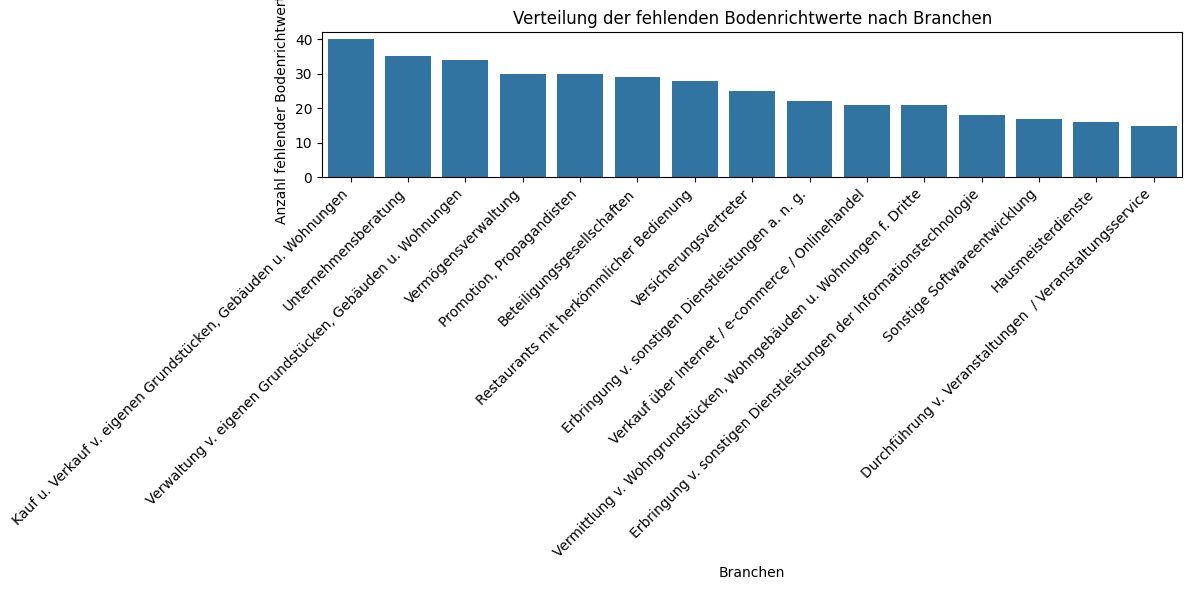

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_brw["ihk_branch_desc"].value_counts().index[0:15], y=missing_brw["ihk_branch_desc"].value_counts().values[0:15])
plt.xlabel("Branchen")
plt.ylabel("Anzahl fehlender Bodenrichtwerte")
plt.title("Verteilung der fehlenden Bodenrichtwerte nach Branchen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

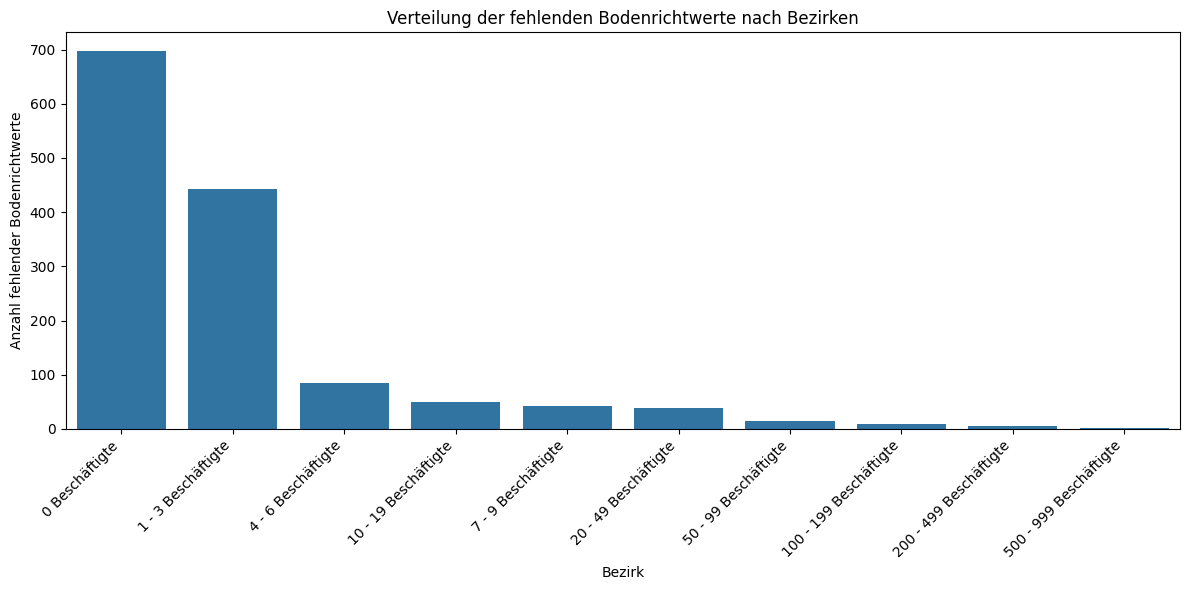

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_brw["employees_range"].value_counts().index, y=missing_brw["employees_range"].value_counts().values)
plt.xlabel("Bezirk")
plt.ylabel("Anzahl fehlender Bodenrichtwerte")
plt.title("Verteilung der fehlenden Bodenrichtwerte nach Bezirken")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
if not missing_brw.empty:
    center_lat = missing_brw["latitude"].mean()
    center_lon = missing_brw["longitude"].mean()
else:
    center_lat, center_lon = 52.52, 13.4050  # z.B. Berlin

# Erstelle die Folium-Karte
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Erstelle einen MarkerCluster für eine bessere Darstellung
marker_cluster = MarkerCluster().add_to(m)

# Füge für jede Zeile einen Marker hinzu
for idx, row in missing_brw.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    # Passe den Popup-Text je nach Bedarf an – hier z.B. mit Bezirk-Information
    popup_text = f"Bodenrichtwert: {row.get('Bodenrichtwert', 'Keine Angabe')}"
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(marker_cluster)

# Zeige die Karte an (in Jupyter Notebooks wird die Variable m automatisch als Karte angezeigt)
m